In [2]:
import pandas as pd
import math
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import TextBox
import plotly.express as px

# Stock Price EDA

In [3]:
df_stockprice = pd.read_csv("df_stockprice.csv")
df_stockprice


,date,open,high,low,close,adjclose,volume,ticker
0,2020-06-01,50.000000,53.209999,49.540001,52.299999,52.299999,1275800,BNTX
1,2020-06-02,51.980000,52.849998,50.099998,52.380001,52.380001,688500,BNTX
2,2020-06-03,51.849998,52.230000,49.540001,51.160000,51.160000,1379900,BNTX
3,2020-06-04,50.450001,51.860001,49.700001,50.000000,50.000000,623300,BNTX
4,2020-06-05,49.799999,50.230000,48.500000,49.180000,49.180000,768700,BNTX
...,...,...,...,...,...,...,...,...
1261,2021-03-25,48.930000,49.790001,48.810001,49.700001,49.700001,6800200,AZN
1262,2021-03-26,49.560001,50.669998,49.480000,50.639999,50.639999,9705800,AZN
1263,2021-03-29,50.549999,51.060001,50.480000,50.810001,50.810001,8652400,AZN
1264,2021-03-30,50.139999,50.169998,49.689999,49.970001,49.970001,7084800,AZN


In [4]:
# Add Pct Change Column
pct_change = []
n = 0
for ticker in df_stockprice['ticker'].unique():
    df_temp = df_stockprice[df_stockprice['ticker']==ticker]
    df_temp = df_temp.reset_index()
    pct_change.append(np.nan)
    for i in range(df_temp.shape[0]-1):
        pct_change.append((df_temp['close'][i+1]/df_temp['close'][i]) - 1)


df_stockprice['fluctuation'] = pct_change

In [5]:
df_temp['close']

0      55.160000
1      54.720001
2      55.000000
3      53.869999
4      53.849998
         ...    
206    49.700001
207    50.639999
208    50.810001
209    49.970001
210    49.720001
Name: close, Length: 211, dtype: float64

In [6]:
df_stockprice['ticker'].astype(str)

0       BNTX
1       BNTX
2       BNTX
3       BNTX
4       BNTX
        ... 
1261     AZN
1262     AZN
1263     AZN
1264     AZN
1265     AZN
Name: ticker, Length: 1266, dtype: object

In [28]:
fig = px.line(df_stockprice, x="date", y="close", color="ticker")
fig.update_layout(title = ('Stock Price Overview'),
                    xaxis_title = "Date",
                    yaxis_title ="Closing Price")
fig.show()

Unsupported

In [41]:
fig = px.line(df_stockprice, x="date", y="volume", color="ticker")
fig.update_layout(title = ('Volume Overview'),
                    xaxis_title = "Date",
                    yaxis_title ="Volumn")
fig.show()

Unsupported

In [110]:
fig = px.line(df_stockprice, x="date", y="fluctuation", color="ticker")
fig.update_layout(title = ('Fluctuation Overview'),
                    xaxis_title = "Date",
                    yaxis_title ="% Change")
fig.show()

Unsupported

In [13]:
# df_stockprice['month'] = [d.split('-')[1] for d in df_stockprice['date']]
df_stockprice1 = df_stockprice.copy()
df_stockprice1.set_index('date', inplace = True, drop = False)
df_stockprice1

,date,open,high,low,close,adjclose,volume,ticker,fluctuation,month
date,,,,,,,,,,
2020-06-01,2020-06-01,50.000000,53.209999,49.540001,52.299999,52.299999,1275800,BNTX,NaN,06
2020-06-02,2020-06-02,51.980000,52.849998,50.099998,52.380001,52.380001,688500,BNTX,0.001530,06
2020-06-03,2020-06-03,51.849998,52.230000,49.540001,51.160000,51.160000,1379900,BNTX,-0.023291,06
2020-06-04,2020-06-04,50.450001,51.860001,49.700001,50.000000,50.000000,623300,BNTX,-0.022674,06
2020-06-05,2020-06-05,49.799999,50.230000,48.500000,49.180000,49.180000,768700,BNTX,-0.016400,06
...,...,...,...,...,...,...,...,...,...,...
2021-03-25,2021-03-25,48.930000,49.790001,48.810001,49.700001,49.700001,6800200,AZN,0.018651,03
2021-03-26,2021-03-26,49.560001,50.669998,49.480000,50.639999,50.639999,9705800,AZN,0.018913,03
2021-03-29,2021-03-29,50.549999,51.060001,50.480000,50.810001,50.810001,8652400,AZN,0.003357,03


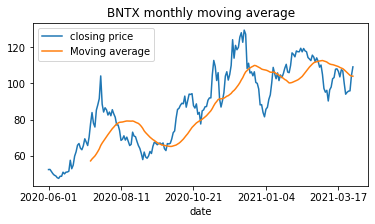

In [20]:
tickers = ['PFE', 'MRNA','AZN','JNJ','NVAX','BNTX']
for t in tickers:
    ax = plt.subplots(1,1, figsize=(6,3))
    plt.title('{} monthly moving average'.format(t))
    df_stockprice1[df_stockprice1['ticker']==t]['close'].plot(legend=True, label='closing price')
    ax2 = df_stockprice1[df_stockprice1['ticker']==t]['close'].rolling(30).mean().plot(legend=True, label='Moving average')

# Calls EDA

In [111]:
 df_calls = pd.read_csv("df_calls.csv")
df_calls

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,BNTX210409C00080000,2021-03-19 9:30AM EDT,80.0,24.69,29.00,38.70,0.0,-,1,3,314.36%
1,BNTX210409C00085000,2021-03-22 9:34AM EDT,85.0,21.90,25.20,32.60,0.0,-,1,40,86.72%
2,BNTX210409C00090000,2021-03-30 3:17PM EDT,90.0,15.50,20.70,24.70,0.0,-,1,34,130.57%
3,BNTX210409C00092000,2021-03-22 9:37AM EDT,92.0,16.71,18.30,25.70,0.0,-,1,2,81.45%
4,BNTX210409C00093000,2021-03-05 2:56PM EDT,93.0,8.70,17.40,21.90,0.0,-,6,6,123.93%
...,...,...,...,...,...,...,...,...,...,...,...
214,AZN210409C00054000,2021-03-22 2:55PM EDT,54.0,0.09,0.01,0.03,0.0,-,2,30,33.59%
215,AZN210409C00054500,2021-03-22 12:02PM EDT,54.5,0.19,0.00,0.13,0.0,-,2,8,49.32%
216,AZN210409C00055000,2021-03-23 2:17PM EDT,55.0,0.08,0.00,0.07,0.0,-,5,167,46.09%
217,AZN210409C00056000,2021-03-19 3:20PM EDT,56.0,0.73,0.00,0.51,0.0,-,1,2,70.51%


In [200]:
df_calls.columns

Index(['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid',
       'Ask', 'Change', '% Change', 'Volume', 'Open Interest',
       'Implied Volatility'],
      dtype='object')

In [204]:
df_calls['Implied Volatility'].replace('%','')

0      314.36%
1       86.72%
2      130.57%
3       81.45%
4      123.93%
        ...   
214     33.59%
215     49.32%
216     46.09%
217     70.51%
218    105.27%
Name: Implied Volatility, Length: 219, dtype: object

In [215]:
df_calls['Implied Volatility (PCT)'] = [float(s.split('%')[0]) for s in df_calls['Implied Volatility']]

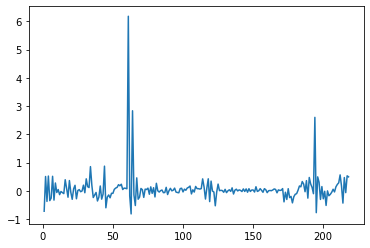

In [216]:
df_calls['Implied Volatility (PCT)'].pct_change().plot()

# Tweets EDA

In [113]:
df_tweets = pd.read_csv("df_tweets.csv")
df_tweets = df_tweets[df_tweets['language'] == 'en']
df_tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1376833096667045890,1376833096667045888,2021-03-30 05:46:05 ??2???¨¢?¨º¡À,2021-03-30,05:46:05,-400,62465691,astrazeneca,AstraZeneca,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1376522028002512899,1376522028002512896,2021-03-29 09:10:00 ??2???¨¢?¨º¡À,2021-03-29,09:10:00,-400,62465691,astrazeneca,AstraZeneca,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1375122038810087427,1375122038810087424,2021-03-25 12:26:57 ??2???¨¢?¨º¡À,2021-03-25,12:26:57,-400,62465691,astrazeneca,AstraZeneca,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1373894259888230404,1373894259888230400,2021-03-22 03:08:11 ??2???¨¢?¨º¡À,2021-03-22,03:08:11,-400,62465691,astrazeneca,AstraZeneca,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1373685764047966211,1373685764047966208,2021-03-21 13:19:42 ??2???¨¢?¨º¡À,2021-03-21,13:19:42,-400,62465691,astrazeneca,AstraZeneca,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,1268534473458692100,1268534473458692096,2020-06-04 09:26:01 ??2???¨¢?¨º¡À,2020-06-04,09:26:01,-400,56488059,pfizer,Pfizer Inc.,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2223,1267850705357938688,1267646400118034432,2020-06-02 12:08:58 ??2???¨¢?¨º¡À,2020-06-02,12:08:58,-400,56488059,pfizer,Pfizer Inc.,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'herrerce', 'name': 'Carlos H...",NaN,NaN,NaN,NaN
2224,1267795969233563648,1267795969233563648,2020-06-02 08:31:28 ??2???¨¢?¨º¡À,2020-06-02,08:31:28,-400,56488059,pfizer,Pfizer Inc.,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2225,1267572476348968966,1267156953635094528,2020-06-01 17:43:23 ??2???¨¢?¨º¡À,2020-06-01,17:43:23,-400,56488059,pfizer,Pfizer Inc.,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'moheissa10', 'name': 'mohame...",NaN,NaN,NaN,NaN


In [114]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [115]:
from spacy.lang.en import STOP_WORDS
def remove_stopword(x):
    return " ".join([y for y in x.split() if y not in STOP_WORDS])

In [116]:
df_tweets['tweet'] = df_tweets['tweet'].apply(lambda x:clean_text(x))

In [117]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [118]:
from textblob import TextBlob
df_tweets['sentiment'] = df_tweets['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [120]:
df_tweets['str_tweet'] = ["".join(t) for t in df_tweets['tweet']]
df_tweets['str_tweet'] = df_tweets['str_tweet'].apply(lambda x:clean_text(x))
df_tweets['str_tweet'] = df_tweets['str_tweet'].apply(lambda x:remove_stopword(x))
df_tweets['str_tweet']

0       reducing carbon emissions critical commitment ...
1       younghealthprogramme core sustainability ambit...
2       recently released data vaccine phase iii trial...
3       fight imperative develop vaccines work realwor...
4       deeply saddened news josé baselga evp oncology...
                              ...                        
2222    proud joined generationgavi years ago committe...
2223       herrerce thank reaching contact directly visit
2224    today announced new effort support biotechnolo...
2225                thank reaching contact directly visit
2226    purpose breakthroughs change patients’ lives –...
Name: str_tweet, Length: 2185, dtype: object

In [183]:
df_tweets.name.unique()

array(['AstraZeneca', 'BioNTech SE', 'Johnson & Johnson', 'Moderna',
       'Novavax', 'Pfizer Inc.'], dtype=object)

In [197]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'AstraZeneca']['sentiment'],name = 'AZN'))
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'BioNTech SE']['sentiment'],name = 'BNTX'))
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'Johnson & Johnson']['sentiment'],name = 'JNJ'))
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'Moderna']['sentiment'],name = 'MRNA'))
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'Novavax']['sentiment'],name = 'NVAX'))
fig.add_trace(go.Histogram(x=df_tweets[df_tweets['name'] == 'Pfizer Inc.']['sentiment'],name = 'PFE'))

# Overlay both histograms
fig.update_layout(barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=1)
fig.update_layout(title = ('Sentiment Score Breakdown'),
                    xaxis_title = "Sentiment Score",
                    yaxis_title ="Count")
fig.show()

Unsupported

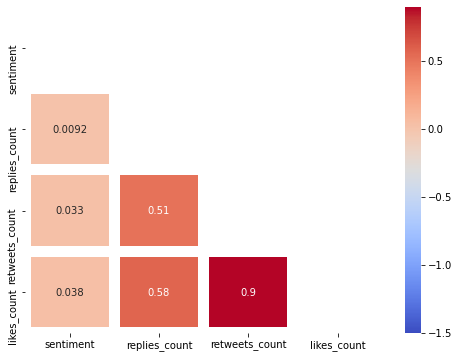

In [181]:
correlation = df_tweets[['sentiment', 'replies_count','retweets_count','likes_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask)

### Wordcloud

In [45]:
pip install wordcloud

     |████████████████████████████████| 366 kB 22.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


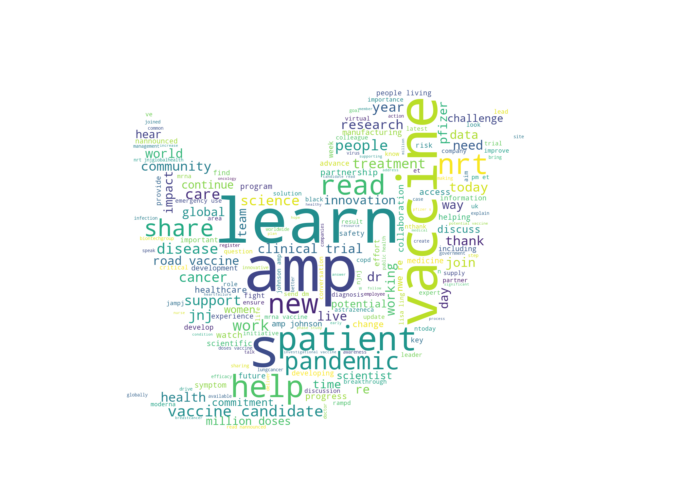

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
text = '/n'.join(df_tweets['str_tweet'])

plt.subplots(1,1, figsize=(12,12))
mask = np.array(Image.open('mask.jpeg'))
wc = WordCloud(background_color='white', random_state=8, 
               mask=mask)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Tweets: Related Novavax

In [98]:
df_tweets_nocvavax = pd.read_json('novavax_related_merged.json', orient = 'records', lines = True)
# df_tweets_nocvavax = df_tweets_nocvavax[df_tweets_nocvavax['language'] == 'en']
df_tweets_nocvavax

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1311092717489852417,1311092717489852416,2020-09-29 19:57:17 ??2???¨¢?¨º¡À,2020-09-29,19:57:17,-400,943836257125150720,stock_invester7,stock trader's,,...,,,,,,[],,,,
1,1311085851657613314,1311085851657613312,2020-09-29 19:30:00 ??2???¨¢?¨º¡À,2020-09-29,19:30:00,-400,1306815336973393920,traderlila,Lila Trader,,...,,,,,,[],,,,
2,1311084765986971648,1311084765986971648,2020-09-29 19:25:41 ??2???¨¢?¨º¡À,2020-09-29,19:25:41,-400,943836257125150720,stock_invester7,stock trader's,,...,,,,,,[],,,,
3,1311083438968115202,1311083438968115200,2020-09-29 19:20:25 ??2???¨¢?¨º¡À,2020-09-29,19:20:25,-400,2344420430,insideralerts4u,Insider Alerts,,...,,,,,,[],,,,
4,1311081338557140992,1311081338557140992,2020-09-29 19:12:04 ??2???¨¢?¨º¡À,2020-09-29,19:12:04,-400,831258415,visualstockrsrc,Stocks News&Markets,,...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58279,1356034567669481475,1356034567669481472,2021-01-31 19:20:09 ??2?¡À¨º¡Á?¨º¡À??,2021-01-31,19:20:09,-400,1189861043297587200,robinliang5,Robin Liang,,...,,,,,,[],,,,
58280,1356034372395094019,1355920406067240960,2021-01-31 19:19:22 ??2?¡À¨º¡Á?¨º¡À??,2021-01-31,19:19:22,-400,1283426262699016193,mustapha852,Mustapha,,...,,,,,,"[{'screen_name': 'GetBenchmarkCo', 'name': 'Be...",,,,
58281,1356030768707997700,1356030768707997696,2021-01-31 19:05:03 ??2?¡À¨º¡Á?¨º¡À??,2021-01-31,19:05:03,-400,121158213,alerttrade,"Trade Alerts, Trade Ideas and Crypto 🇺🇸",,...,,,,,,[],,,,
58282,1356030443016118280,1356030443016118272,2021-01-31 19:03:46 ??2?¡À¨º¡Á?¨º¡À??,2021-01-31,19:03:46,-400,2241340806,elianoy,Eliano,,...,,,,,,[],,,,


In [104]:
df_tweets_nocvavax['str_tweet'] = ["".join(t) for t in df_tweets_nocvavax['tweet']]
df_tweets_nocvavax['str_tweet'] = df_tweets_nocvavax['str_tweet'].apply(lambda x:clean_text(x))
df_tweets_nocvavax['str_tweet'] = df_tweets_nocvavax['str_tweet'].apply(lambda x:remove_stopword(x))
df_tweets_nocvavax['str_tweet']

In [101]:
from textblob import TextBlob
df_tweets_nocvavax['tweet'] = df_tweets_nocvavax['tweet'].apply(lambda x:clean_text(x))
df_tweets_nocvavax['sentiment'] = df_tweets_nocvavax['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [60]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_tweets_nocvavax['sentiment'], name = 'NVAX'))

# Overlay both histograms
# fig.update_layout(barmode='stack')
# Reduce opacity to see both histograms
fig.update_traces(opacity=1)
fig.update_layout(title = ('Novavax Related Sentiment Score'),
                    xaxis_title = "Sentiment Score",
                    yaxis_title ="Count")
fig.show()

Unsupported

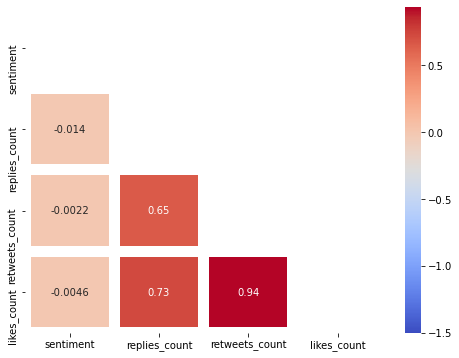

In [61]:
correlation = df_tweets_nocvavax[['sentiment', 'replies_count','retweets_count','likes_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask)

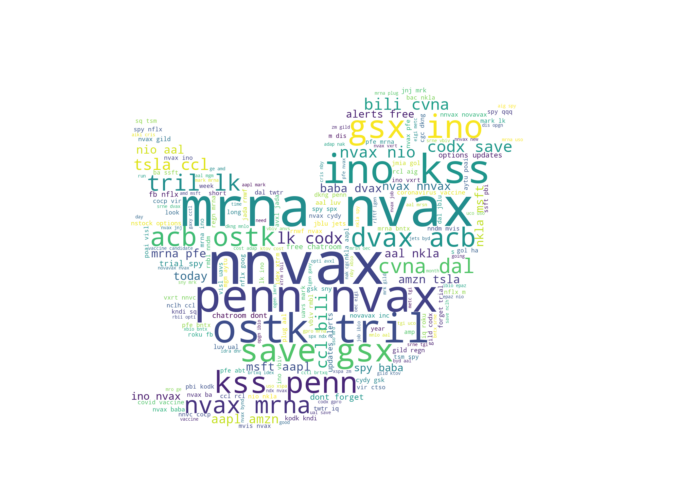

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
text = '/n'.join(df_tweets_nocvavax['str_tweet'])
text
plt.subplots(1,1, figsize=(12,12))
mask = np.array(Image.open('mask.jpeg'))
wc = WordCloud(background_color='white', random_state=8, 
               mask=mask)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()